In [6]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import warnings
warnings.filterwarnings('ignore')
from skimage import img_as_float, img_as_ubyte
im = data.coins()

In [7]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):

    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    
    plt.show()


# Funkcja z filtrem

In [8]:
def Filtr_Dolno_Przepustowy(image, rozmiar):
    
    obraz = np.array([[1, 2], [3, 4]])
    obraz2 = np.stack((image))
    
    M = rozmiar//2
    for i in range(obraz2.shape[0]):
        for j in range(obraz2.shape[1]):
            suma = 0
            for x in range(rozmiar):
                for y in range(rozmiar):
                    ii=i+x-M
                    jj=j+y-M
                    if ii<0 or ii>=obraz2.shape[0] or jj<0 or jj>=obraz2.shape[1]:
                        suma += 0
                    else:
                        suma += obraz2[ii][jj]
            obraz2[i][j]=suma/(rozmiar**2)
    return obraz2
img2 = Filtr_Dolno_Przepustowy(im, 3)


# Porównanie obrazów

(303, 384) float64
(303, 384) uint8


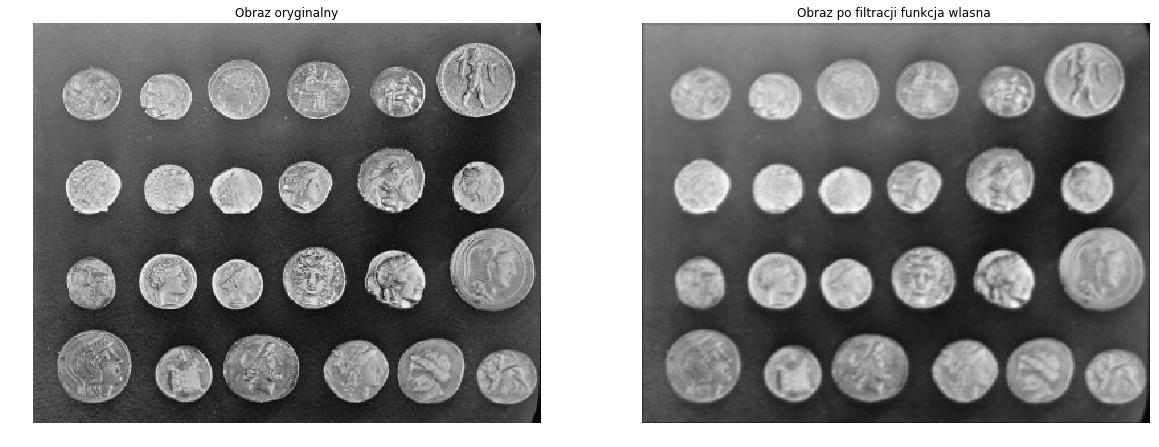

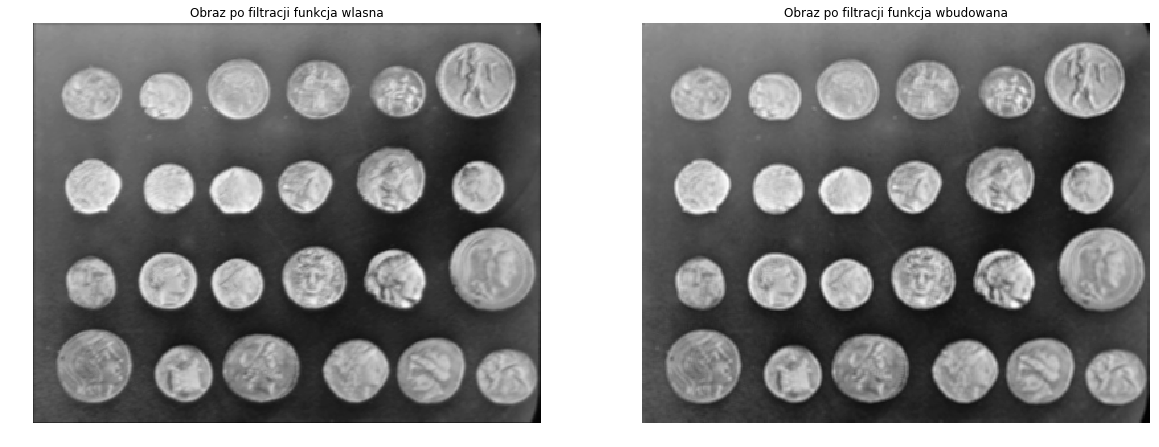

In [9]:


imf = img_as_float(im)
print(imf.shape, imf.dtype)

imf = img_as_ubyte(imf)
print(imf.shape, imf.dtype)

bimf = cv2.blur(imf,  (3,3))
show2imgs( im, img2, title1='Obraz oryginalny', title2 = 'Obraz po filtracji funkcja wlasna ',size=(20,20))
show2imgs( img2, bimf, title1='Obraz po filtracji funkcja wlasna', title2='Obraz po filtracji funkcja wbudowana', size=(20,20))
